In [2]:
import json, glob, yt, os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

from analysis_helpers import *

%matplotlib inline


C:\Users\azton\Anaconda3\lib\site-packages\yt\utilities\logger.py:4: VisibleDeprecationWarning: The configuration file C:\Users\azton\.config\yt\ytrc is deprecated in favor of C:\Users\azton\.config\yt\yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [3]:
sim = 'phx256-*'
orig_files = glob.glob('C:/Users/azton/Projects/phoenix_analysis/%s/*p2_origin_qtys.json'%sim)
with open(orig_files[0],'r') as f:
    enr = json.load(f)
for i,ofile in enumerate(orig_files):
    if i == 0: continue
    with open(ofile, 'r') as f:
        data = json.load(f)
    for k in data.keys(): 
        if k != 'distance' and k != 'enricher_mass' and k != 'p3_stats':
            # then append to the current dicts keys
            # print(k)
            enr[k] += data[k]
        elif k == 'p3_stats': # enr['p3_stats'][p3idx][key]
            for kk in data[k].keys(): # for idx in p3idx's
                if kk in enr[k].keys(): # append to preexisting p3idx
                    for j in enr[k][kk].keys():
                       enr[k][kk][j] += data[k][kk][j]
                else: # establish the p3idx
                    enr[k][kk] = data[k][kk]

        else: # then its enr[k][index][qty list]
            # print(k)
            for kk in data[k].keys(): # indexes
                if kk in enr[k].keys(): # then append
                    enr[k][kk] += data[k][kk] 
                else: # then create
                    enr[k][kk] = data[k][kk]

In [8]:
simpaths = ['../phoenix/phx256-%d'%d for d in [1,2]]
fouts = ['RD1250','RD1100']
zbins = np.linspace(-7,3,100)
p2zs = None
for s, fout in zip(simpaths, fouts):
    ds = yt.load('%s/%s/%s'%(s, fout, fout))
    ds = add_particle_filters(ds)
    ad = ds.all_data()
    if p2zs:
        p2zs += [float(z) for z in ad['p2_stars','metallicity_fraction'].to('Zsun')]
    else:
        p2zs = [float(z) for z in ad['p2_stars', 'metallicity_fraction'].to('Zsun')]
        print(ad['p2_stars','metallicity_fraction'].to('Zsun'))





yt : [INFO     ] 2021-08-16 15:14:47,724 Parameters: current_time              = 16.548159927217
yt : [INFO     ] 2021-08-16 15:14:47,724 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-08-16 15:14:47,724 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-08-16 15:14:47,724 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-08-16 15:14:47,724 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-08-16 15:14:47,728 Parameters: current_redshift          = 12.451325487595
yt : [INFO     ] 2021-08-16 15:14:47,728 Parameters: omega_lambda              = 0.6889
yt : [INFO     ] 2021-08-16 15:14:47,728 Parameters: omega_matter              = 0.3111
yt : [INFO     ] 2021-08-16 15:14:47,730 Parameters: omega_radiation           = 0
yt : [INFO     ] 2021-08-16 15:14:47,730 Parameters: hubble_constant           = 0.6766
Parsing Hierarchy : 100%|██████████████████████████████████████████████████████| 27260/27260 [00:

yt : [WARNING  ] 2021-08-16 15:14:56,515 The Derived Field ('index', 'cylindrical_r') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('index', 'cylindrical_radius') instead.
yt : [WARNING  ] 2021-08-16 15:14:56,527 The Derived Field ('index', 'disk_angle') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('index', 'spherical_theta') instead.
yt : [WARNING  ] 2021-08-16 15:14:56,531 The Derived Field ('index', 'height') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('index', 'cylindrical_z') instead.
yt : [WARNING  ] 2021-08-16 15:14:56,571 The Derived Field ('p2_stars', 'particle_cylindrical_velocity_theta') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('all', 'particle_velocity_cylindrical_theta') instead.
yt : [WARNING  ] 2021-08-16 15:14:56,573 The Derived Field ('p2_stars', 'particle_cylindrical_velocity_z') is deprecated as of yt v4.0.0 and will be removed in yt v4.1.0. Use ('all', 'particle_veloc

[0.00733761 0.01000176 0.00539211 ... 0.00296478 0.02796728 0.00016973] Zsun


Parsing Hierarchy : 100%|██████████████████████████████████████████████████████| 23785/23785 [00:02<00:00, 8960.49it/s]
yt : [INFO     ] 2021-08-16 15:18:43,513 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2021-08-16 15:18:46,399 Added filter dependency 'p2_stars' for 'new_p2_stars'


16780494 has high metallicity!
16780706 has high metallicity!
16780800 has high metallicity!
16782618 has low metallicity!
16815220 has high metallicity!
17110827 has low metallicity!
17340297 has low metallicity!
17483989 has low metallicity!
16780712 has low metallicity!
16807890 has low metallicity!
16808520 has high metallicity!
16812956 has low metallicity!
16812957 has low metallicity!
16825914 has low metallicity!
16896204 has low metallicity!
16904225 has low metallicity!
16952398 has low metallicity!
17022404 has low metallicity!
17050897 has low metallicity!
17055575 has low metallicity!
17404947 has low metallicity!


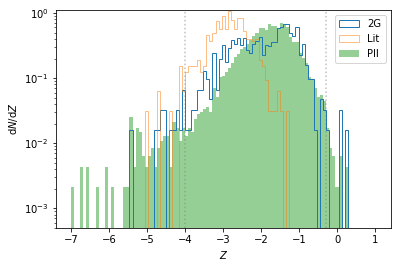

In [97]:
sim = 'phx256-all'
zbins = np.linspace(-7,1,100)
uni_inds = []
uni_pids = []
if os.path.exists('low_metallicity_p2_idx.log'):
    with open('low_metallicity_p2_idx.log','w') as f:
            f.write('##\n')
    with open('high_metallicity_p2_idx.log','w') as f:
            f.write('##\n')
    
for i, pid in enumerate(enr['enrichee_pidx']):
    if pid not in uni_pids:
        if np.log10(enr['enrichee_metal'][i]/0.01295) < -4.:
            print("%d has low metallicity!"%pid)
            with open('low_metallicity_p2_idx.log','a') as f:
                f.write('%d\n'%pid)
        if np.log10(enr['enrichee_metal'][i]/0.01295) > -0.3:
            print("%d has high metallicity!"%pid)
            with open('high_metallicity_p2_idx.log','a') as f:
                f.write('%d\n'%pid)
            
        uni_inds.append(i)
        uni_pids.append(pid)
fig, ax = plt.subplots()
ax.vlines([-4, -0.3], 1e-6, 2, linestyle=':', color='tab:grey', alpha=0.5)
ax.hist(np.log10(ds.arr(enr['enrichee_metal'], 'code_metallicity').to('Zsun')[uni_inds]), 
                    bins=zbins, 
                    density=True, 
                    histtype='step', 
                    label='2G')
import matplotlib.pyplot as plt

with open('low_z_observed_stars.json','r') as f:
    lowz = json.load(f)
feh = []
for i in range(len(lowz['data'])):
    if type(lowz['data'][i]['Fe/H']) == str:
        app = float(lowz['data'][i]['Fe/H'][1:])
    else:
        app = float(lowz['data'][i]['Fe/H'])
    feh.append(app)
ax.hist([i for i in feh], bins=zbins, density=True, alpha=0.5, label='Lit', histtype='step')
ax.hist(np.log10(p2zs), bins=zbins, density=True, histtype='stepfilled', label='PII', alpha=0.5)
ax.set_yscale('log')
ax.set_ylim(5e-4, 1.1)
ax.legend()
ax.set_xlabel('$Z$')
ax.set_ylabel('d$N$/d$Z$')
plt.savefig('p2_origins/%s_p2_MDF.pdf'%sim)


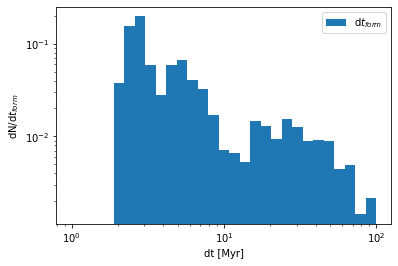

In [80]:
fig, ax = plt.subplots()
bins = np.logspace(0, 2, 30)
ax.hist(enr['formation_dt'], label=['d$t_{form}$','d$t_{sne}$'], bins=bins, density=True)
# ax.hist(enr['sne_dt'], label='d$t_{sne}$', bins=25, color='tab:orange', alpha=0.5, density=True, range=[0,110])
ax.legend()
ax.set_xscale('log')
ax.set_xlabel('dt [Myr]')
ax.set_ylabel('dN/d$t_{form}$')
ax.set_yscale('log')
plt.savefig('p2_origins/%s_dt_toP2.pdf'%sim)


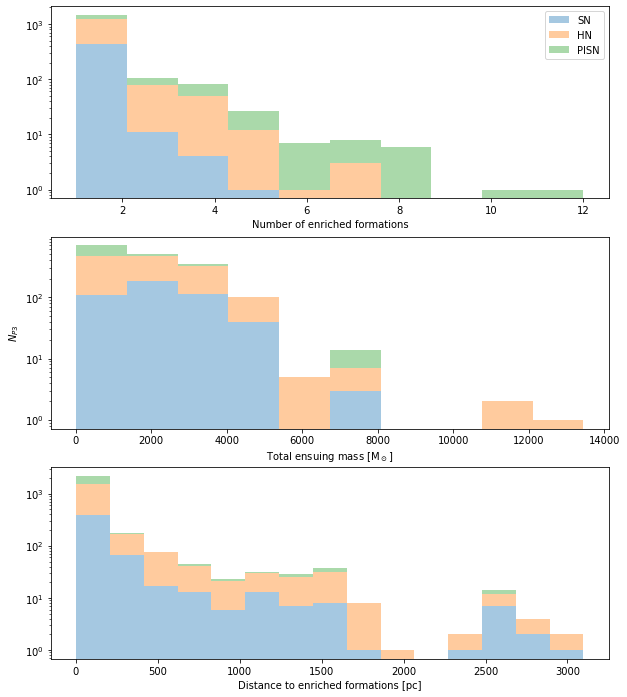

In [81]:

fig, ax = plt.subplots(3,1, figsize=(10,12))
# num_enr = []
# m_enr = []
# r_enr = []

num_sne = [[],[],[]]
m_sne = [[],[],[]]
r_sne = [[],[],[]]

for i, k in enumerate(enr['p3_stats'].keys()):
    # num_enr += [enr['p3_stats'][k]['n_enriched']]
    # m_enr += [enr['p3_stats'][k]['m_enriched']]
    # r_enr += [enr['p3_stats'][k]['r_enriched']]
    m = enr['p3_stats'][k]['mass']
    if (m > 11) and (m < 20):
        bin = 0
    elif (m >= 20) and (m < 40):
        bin = 1
    elif (m >=140) and (m < 260):
        bin = 2

    num_sne[bin].append(enr['p3_stats'][k]['n_enriched'])
    m_sne[bin].append(enr['p3_stats'][k]['m_enriched'])
    for rad in enr['p3_stats'][k]['r_enriched']:
        r_sne[bin].append(rad)



# ax[0][0].hist(num_enr, bins=10, label='N_{enriched}', density = False)
# ax[1][0].hist(m_enr, bins=10, label='Enriched Mass', density=False)
# ax[2][0].hist(r_enr, bins=15, label='Event distance', density=False)

sne_kind = {0:'SN', 1:'HN', 2:'PISN'}
# for type in [0,1,2]:
ax[0].hist(num_sne, bins=10, label=['SN','HN','PISN'], density=False, alpha=0.4, stacked=True)
ax[1].hist(m_sne, bins=10, density=False, alpha=0.4, stacked=True)
ax[2].hist(r_sne, bins=15, density=False, alpha=0.4, stacked=True)
ax[0].legend()
ax[0].set_xlabel('Number of enriched formations')
ax[1].set_xlabel('Total ensuing mass [M$_\odot$]')
ax[2].set_xlabel('Distance to enriched formations [pc]')
ax[2].set_yscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[1].set_ylabel('$N_{P3}$')

plt.savefig('p2_origins/%s_SNeffect.pdf'%sim)




In [ ]:
fig, ax = plt.subplots()
for k in ['enricher_mean_z','enricher_min_z','enricher_max_z']:
    hist, bins = np.histogram(np.log10(enr[k]), bins=25, density=True)
    ax.plot(bins[1:], hist, label=k.split('_')[1])
ax.set_yscale('log')
ax.set_xlim(-4, 4)
ax.set_ylim(1e-2, 1)
ax.legend()
plt.savefig('p2_origins/%s_zpathstat.pdf'%sim)


In [5]:
# plot sne, hne, pisn only enrichment
# sne-hne, sne-pisn, sne-hne, hne-pisn, sne-hne-pisn
labels = ['SN','HN','PISN','SN-HN','SN-PISN','HN-PISN','SN-HN-PISN']
counts = [0, 0, 0, 0, 0, 0, 0]
radii = [[] for c in counts]
nenrichers = [[] for c in counts]
r_enrichers = [[] for c in counts]
p2metals = [[] for c in counts]
mass_enr = [[] for c in counts]
enrichers = []
n_formed = 0
n_smallr = 0
tot_iter = 0
for i, id in enumerate(enr['enricher_mass'].keys()):
    this_enr = [0,0,0]
    n_formed += 1
    mt = 0
    for ii,m in enumerate(enr['enricher_mass'][id]):
        # print('%0.2f'%m, end=' ')
        good_mass = (m > 11 and m <= 20) or (m>20 and m <= 40) or (m > 140 and m < 260)
                # check that distance / velocity < time since sne
        try:
            enr_dist = enr['distance'][id][ii]
        except IndexError as ie:
            print('enr_dist_len = %d; i = %d'%(len(enr['distance'][id]), ii))
            print('enr_dist = ', enr['distance'][id])
            print('enr_mass = ', enr['enricher_mass'][id])
        enr_dt = enr['sne_dt'][tot_iter]
        tot_iter += 1
        c_ism = 10
        if  ds.quan(enr_dist, 'pc').to('km') / (ds.quan(enr_dt, 'Myr').to('s') * ds.quan(c_ism, 'km/s')) >= 100 \
                and good_mass\
                and enr_dist > 200:
            print('%dth of %s appears to not have enrichment radius to meet creation. r = %f; dt = %f, ratio= %0.2e'%\
                (ii, id,enr_dist, enr_dt, ds.quan(enr_dist, 'pc').to('km') / (ds.quan(enr_dt, 'Myr').to('s') * ds.quan(c_ism, 'km/s'))))
            n_smallr+=1
            continue
        if enr_dt < 0: continue
            
        if m > 11 and m <= 20:
            this_enr[0] += 1
            mt += m
            good_mass = True
        elif m > 20 and m < 40.0059:
            this_enr[1] += 1
            mt += m
            good_mass = True
        elif m >140 and m < 260:
            this_enr[2] += 1
            mt += m
            good_mass = True

        # dist[pc] * [km/pc] / [km/s] <= enr_dt[Myr] * [s/Myr]

            
#         else:
#             print('%e mass out of bounds, whats that all about?'%(m*1e20))
    if this_enr[0] > 0 and this_enr[1] == 0:
        print(this_enr)
    # if this_enr[2] > 1 and this_enr[0]==0 and this_enr[1] == 0:
    #     print('MultiPISN!')
    binid = [1 if i > 0 else 0 for i in this_enr]
    this_enr = binid
    # print('\n\n')
    if this_enr == [1,0,0]: # SNE
        mass_enr[0] .append(mt)
        counts[0] += 1
        radii[0] += enr['distance'][id]
        nenrichers[0].append(len(enr['distance'][id]))
        r_enrichers[0].append(np.average(enr['distance'][id]))
        p2metals[0].append(enr['enrichee_metal'][i])
    elif this_enr == [0,1,0]: # HNE
        mass_enr[1] .append(mt)
        counts[1] += 1
        radii[1] += enr['distance'][id]
        r_enrichers[1].append(np.average(enr['distance'][id]))
        p2metals[1].append(enr['enrichee_metal'][i])
        nenrichers[1].append(len(enr['distance'][id]))
    elif this_enr == [0,0,1]: # PISN
        mass_enr[2] .append(mt)
        counts[2] += 1
        radii[2] += enr['distance'][id]
        nenrichers[2].append(len(enr['distance'][id]))
        r_enrichers[2].append(np.average(enr['distance'][id]))
        p2metals[2].append(enr['enrichee_metal'][i])
    elif this_enr == [1,1,0]: # SN+HN
        mass_enr[3] .append(mt)
        counts[3] += 1
        radii[3] += enr['distance'][id]
        nenrichers[3].append(len(enr['distance'][id]))
        r_enrichers[3].append(np.average(enr['distance'][id]))
        p2metals[3].append(enr['enrichee_metal'][i])
    elif this_enr == [1,0,1]: # SN + PISN
        mass_enr[4].append(mt)
        counts[4] += 1
        radii[4] += enr['distance'][id]
        nenrichers[4].append(len(enr['distance'][id]))
        r_enrichers[4].append(np.average(enr['distance'][id]))
        p2metals[4].append(enr['enrichee_metal'][i])
    elif this_enr == [0, 1, 1]: # HN + PISN
        mass_enr[5] .append(mt)
        counts[5] += 1
        radii[5] += enr['distance'][id]
        nenrichers[5].append(len(enr['distance'][id]))
        r_enrichers[5].append(np.average(enr['distance'][id]))
        p2metals[5].append(enr['enrichee_metal'][i])
    elif this_enr == [1,1,1]: # ALL
        mass_enr[6] .append(mt)
        counts[6] += 1
        radii[6] += enr['distance'][id]
        nenrichers[6].append(len(enr['distance'][id]))
        r_enrichers[6].append(np.average(enr['distance'][id]))
        p2metals[6].append(enr['enrichee_metal'][i])
print("%d/%d seem too small to affect formation"%(n_smallr, tot_iter))

NameError: name 'ds' is not defined

<ipython-input-6-d66f407469e8>:10: RuntimeWarning: divide by zero encountered in log10
  mean_z = np.log10([np.average(z)/0.01295 if len(z) > 0 else 0 for z in p2metals])
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<ipython-input-6-d66f407469e8>:77: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axt.set_yscale('log')
<ipython-input-6-d66f407469e8>:78: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axt1.set_yscale('log')
<ipython-input-6-d66f407469e8>:79: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[1].set_yscale('log')


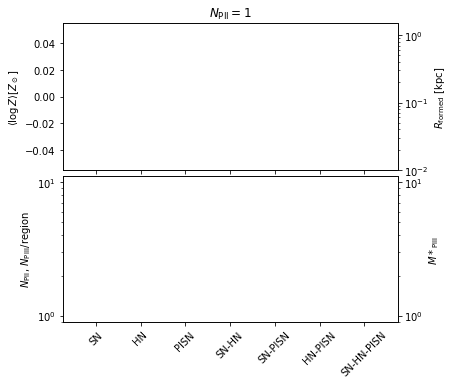

In [6]:
# print(counts)
means = np.array([np.average(r) if len(r) > 0 else 0 for r in radii])
minr = np.array([min(r) if len(r) > 0 else 0 for r in radii])
maxr = np.array([max(r) if len(r) > 0 else 0 for r in radii])
stdr = np.array([np.std(r) if len(r) > 0 else 0 for r in radii])

mean_n = [np.average(n) if len(n) > 0 else 0 for n in nenrichers]
std_n = [np.std(n) if len(n) > 0 else 0 for n in nenrichers]

mean_z = np.log10([np.average(z)/0.01295 if len(z) > 0 else 0 for z in p2metals])
std_z = np.array([np.std(np.log10(z)-np.log10(0.01295)) if len(z) > 0 else 0 for z in p2metals])
# min_z = np.array([min(z) if len(z) > 0 else 0 for z in p2metals])

mform = np.array([np.average(m) if len(m) > 0 else 0 for m in mass_enr])
mmax = np.array([max(m) if len(m) > 0 else 0 for m in mass_enr])
mmin = np.array([min(m) if len(m) > 0 else 0 for m in mass_enr])
mstd = np.array([np.std(m) if len(m) > 0 else 0 for m in mass_enr])

fig, ax = plt.subplots(2,1, figsize=(6,5.5), sharex=True)
axt = ax[0].twinx()
ax[0].set_title('$N_{\\rm PII} = $%d'%n_formed)

label_loc = np.arange(len(labels))
width=0.8/2.0
ax[0].errorbar(label_loc-0.2, mean_z,
#                 tick_label=labels,
                alpha=0.8,
#                 width=-1*width,
                yerr=std_z,
                capsize=8,
#                 align='edge',
#                 color='tab:blue',
                label='$Z_{\\rm P2}$',
                linewidth=2)
ax[0].scatter(label_loc-0.205, mean_z, s=45)
axt.bar(label_loc, means/1e3, 
                yerr=stdr/1e3, 
                tick_label=labels, 
                alpha=0.7, 
                color='tab:green',
                capsize=5,
                width=width,
                align='edge', 
                label = '$\langle N_{\\rm P3}/{\\rm region} \\rangle$')

width = 0.8/3.
ax[1].bar(label_loc-width, np.array(counts), 
                tick_label=labels, 
                alpha = 0.7, 
                width=width, 
                align='center', 
                color='tab:blue',
                label = '$N_{\\rm P2}$')
axt1 = ax[1].twinx()
axt1.bar(label_loc+width, mform,
                tick_label=labels,
                alpha=0.7,
                width=width,
                yerr = mstd,
                capsize=5,
                align='center',
                color='tab:orange',
                label='$M_{\\rm PIII}$')
ax[1].bar(label_loc, mean_n, 
                tick_label=labels, 
                alpha=0.7, 
                width=width, 
                align='center', 
                color='tab:green',
                capsize=5,
                yerr=std_n,
                label='$R_{\\rm enrich}$')

# ax[0].set_yscale('log')
ax[0].set_ylabel('$\\langle \log  Z\\rangle [Z_\odot]$')
# ax[0].set_ylim(0, -7)
axt.set_yscale('log')
axt1.set_yscale('log')
ax[1].set_yscale('log')
axt.set_ylim(1e-2,1.5)
# ax.set_ylim(0, 40)
axt.set_ylabel('$R_{\\rm formed}$ [kpc]')
ax[1].set_ylabel('$N_{\\rm PII}$, $N_{\\rm PIII}/$region')
axt1.set_ylabel('$M*_{\\rm PIII}$')
ax[1].set_xticklabels(labels, rotation=45)
plt.subplots_adjust(hspace=0.04)
plt.savefig('Formation_stats.pdf', bbox_inches='tight')
# print(std_z)
# print(mform)


<ipython-input-57-6dafb7e87788>:11: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im.append(ax[i].hist2d(r_enrichers[i], p2metals[i], bins=[xbins,ybins], cmap = 'winter', norm=LogNorm(), label=l, alpha=0.9, vmin=1, vmax=35))
<ipython-input-57-6dafb7e87788>:15: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im.append(ax[-1].hist2d(allrz[0], allrz[1], bins=[xbins,ybins], label=l, alpha=0.8, cmap='winter', norm=LogNorm(),vmin=1, vmax=35))


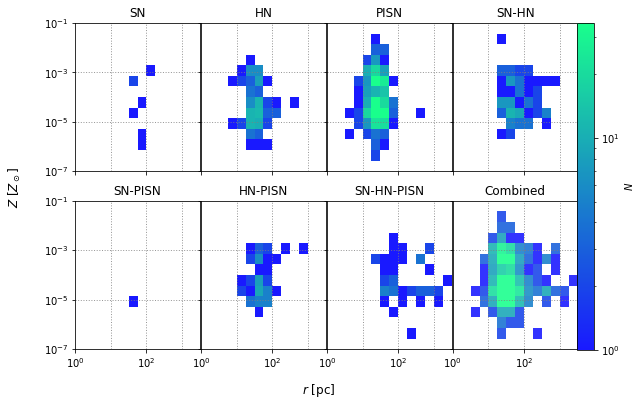

In [57]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(2,4, figsize=(9,6), sharex=True, sharey=True)
ax= ax.flatten()
ybins = np.logspace(-7,-1, 15)
xbins = np.logspace(0, 3.5, 15)
allrz = [[],[]]
im = []
for i, l in enumerate(labels):
    allrz[0]+=r_enrichers[i]
    allrz[1]+=p2metals[i]
    im.append(ax[i].hist2d(r_enrichers[i], p2metals[i], bins=[xbins,ybins], cmap = 'winter', norm=LogNorm(), label=l, alpha=0.9, vmin=1, vmax=35))
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].set_title(l)
im.append(ax[-1].hist2d(allrz[0], allrz[1], bins=[xbins,ybins], label=l, alpha=0.8, cmap='winter', norm=LogNorm(),vmin=1, vmax=35))
ax[-1].set_yscale('log')
ax[-1].set_xscale('log')
ax[-1].set_title("Combined")
for a in ax:
    a.hlines([1e-5, 1e-3], 1,3e3, linestyle=':', color='tab:gray', alpha=0.8, linewidth=1)
    a.vlines([1e1, 1e2, 1e3], 1e-7, 1e-1, linestyle=':', color='tab:gray', alpha=0.8, linewidth=1)
fig.supxlabel('$r$ [pc]')
fig.supylabel('$Z$ $[Z_\odot]$')
cax = fig.add_axes([0.9, 0.124, 0.025, 0.756])
fig.subplots_adjust(right=0.9)
fig.subplots_adjust(wspace=0.01)
cb = fig.colorbar(im[2][3], cax=cax, label = '$N$')
plt.savefig('./images/sntype_rVz_2dhist.pdf', bbox_inches='tight')

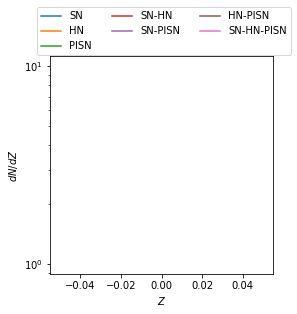

In [7]:
fig, ax = plt.subplots(figsize=(4,4))
zbins = np.linspace(-7,1,10)
plotbins = np.array([(zbins[i]+zbins[i-1])/2.0 for i in range(1, len(zbins))])
sum = 0
for z in p2metals:
    sum += len(z)
for z, l in zip(p2metals, labels):
    hist, bins = np.histogram(np.log10(z), bins=zbins)
    ax.plot(plotbins[hist!=0], hist[hist!=0], label=l, linestyle = '-')
    ax.scatter(plotbins[hist!=0], hist[hist!=0], marker = 'x', s=45)
ax.set_ylabel('$dN/dZ$')
ax.set_xlabel('$Z$')
# ax.set_xlim(-6.2, -0.5)
# ax.set_ylim(4e-3, 5)
ax.set_yscale('log')
ax.legend(ncol=3, bbox_to_anchor=(1.1,1.25))
plt.savefig('images/p2_MDF_by_config.pdf')

C:\Users\azton\Anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\azton\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


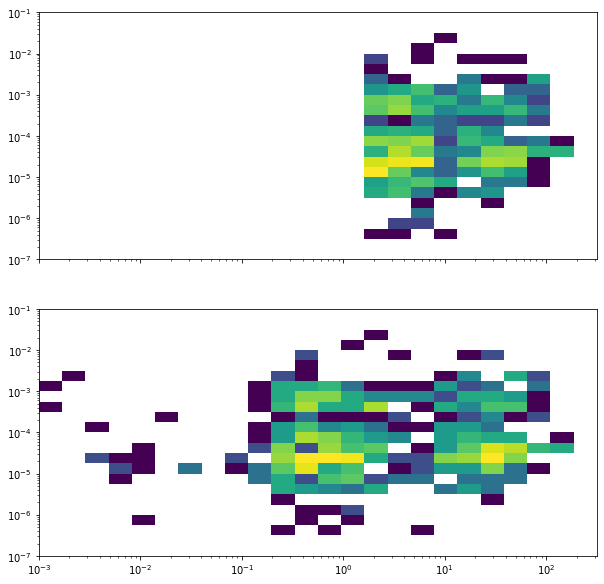

In [60]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(2,1, figsize=(10,10), sharex=True, sharey=True)
mean_r = []
mean_dtsn = []
mean_dtform = []
mean_z = []
i0 = 0
for i, pid in enumerate(enr['enricher_mass'].keys()):
    n3 = len(enr['distance'][pid])
    mean_r += [
                np.average(enr['distance'][pid])
    ]
    mean_dtform += [
                np.average(enr['formation_dt'][i0:i0+n3])
    ]
    mean_dtsn += [
                np.average(enr['sne_dt'][i0:i0+n3])
    ]
    i0 += n3
    mean_z.append(enr['enrichee_metal'][i])
# print(mean_dtsn)
xbins = np.logspace(-3,2.5,25)
ybins = np.logspace(-7,-1,25)
ax[0].hist2d(mean_dtform, mean_z, bins=[xbins, ybins], norm=LogNorm())
ax[1].hist2d(mean_dtsn, mean_z, bins=[xbins,ybins], norm=LogNorm())
ax[0].set_yscale('log')
ax[1].set_xscale('log')


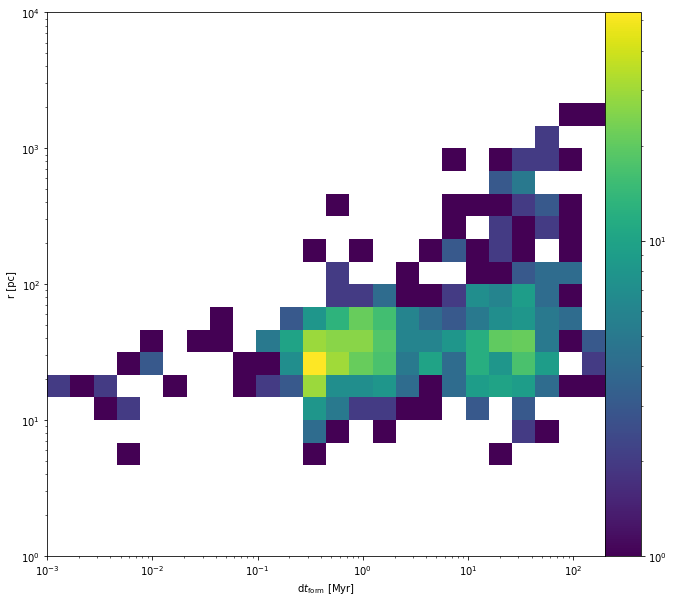

In [61]:
fig, ax = plt.subplots(figsize=(10,10), sharex=True, sharey=True)
rbins= np.logspace(0,4,25)
xbins = np.logspace(-3,2.3,25)

im = ax.hist2d(mean_dtsn, mean_r, bins=[xbins, rbins], norm=LogNorm())
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('d$t_{\\rm form}$ [Myr]')
ax.set_ylabel('r [pc]')
plt.subplots_adjust(right=0.9)
cax = fig.add_axes([0.9,0.125, 0.05, 0.7552])
fig.colorbar(im[3], cax)

In [91]:
enr['sne_dt']


[0.32813959099442513,
 0.44433415676033405,
 2.4265644225005474,
 -0.1599954899142233,
 0.4207893903976867,
 -0.04479469767863975,
 0.5359901826332703,
 0.31110558581073633,
 0.31110558581073633,
 0.31448723177760485,
 0.3318179122939853,
 0.3488014887058739,
 0.36620204905040055,
 1.3842623871946103,
 1.9699039373018081,
 0.4398000893188794,
 2.6924653576831474,
 2.590067428545723,
 1.0361159725072184,
 2.7135841511959313,
 -0.05584579424731828,
 3.2943690315078413,
 2.5207008009848266,
 0.36647579090046634,
 1.8479824576722308,
 1.1798848310890833,
 2.1531948370781038,
 0.24462839497266486,
 0.7122822622858678,
 2.734388084917043,
 0.21267857705498727,
 2.7669153663283907,
 0.2452058584663348,
 2.8359735939706354,
 0.06654364852738581,
 3.4167584742825454,
 2.6430902437595307,
 2.275584279852808,
 -0.05704350964643368,
 2.8148548004578515,
 2.712456871320427,
 0.48886523367517043,
 1.9703719004469349,
 1.3022742738637874,
 1.1585054152819225,
 0.36701783774736896,
 -0.054915998702853